1. Yolov5沒有發表論文，自稱Yolov5有爭議。模型架構或效能與Yolov4差異不大，但訓練較有效率，Yolov5神經網路共有4種大小版本 - Yolov5s、Yolov5m、Yolov5l、Yolov5x。
2. Yolov5神經網路和Yolov4一樣，都使用FPN+PAN的結構。深層的feature map有較強的語義特徵，較弱的定位訊息。而淺層的feature map則相反。FPN將深層的語義特徵傳到淺層，增強多尺度的語義表達。PAN將淺層的定位訊息傳到深層，增強多尺度的定位能力。
3. Yolov5和Yolov4都採用Mosaic影像增強方法，提升模型訓練效果顯著。
4. Yolov5預設9組[w,h]大小的auto anchor，神經網路最後的3層特徵圖各使用3組auto anchor，即特徵圖每個網格使用行3種尺寸的anchor box與gt(ground truth)進行比對。Yolov5訓練前會計算預設的auto anchor與gt的bpr(best possible recall)，當bpr<0.98時會重新調整anchor，使用k-means及遺傳演算法重新計算9組[w,h]大小的auto anchor。
5. Yolov3與Yolov4一個gt只匹配一個正樣本，Yolov5一個gt可以被匹配最多27個anchor，對於正負樣本平衡有幫助。
6. Yolov5的loss包含3個loss函數，(1)box loss-計算anchor與gt的ciou_loss，(2)obj loss-計算網格的confidence是否正確，使用BCEWithLogitsLoss，(3)cls loss-計算與gt相對應的anchor的分類是否正確，使用BCEWithLogitsLoss。注:box loss有giou_Loss，diou_Loss，ciou_Loss。
7. 在目標檢測的後處理中，對應一gt有很多目標框，需要進行Non-Maximum Suppression(nms)篩選。Yolov4採用diou_nms的方式，Yolov5採用weighted_nms的方式。

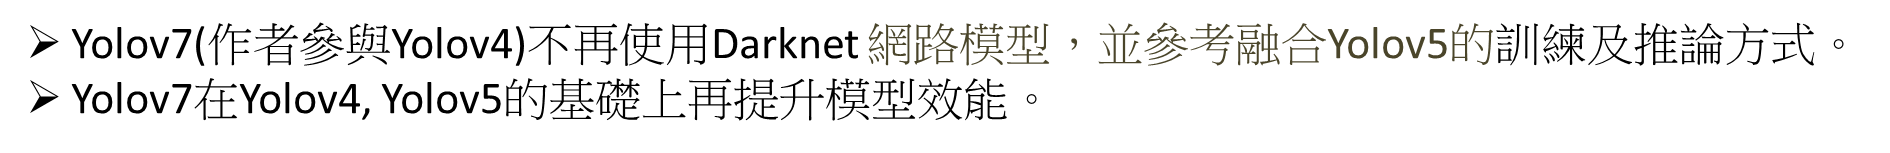

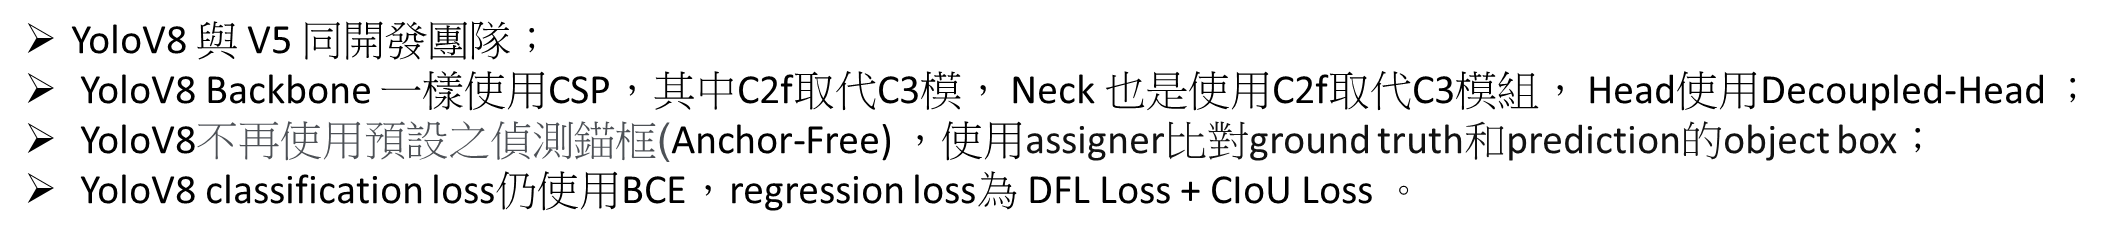

###**Reference:**

###All about yolo:


https://docs.ultralytics.com/quickstart/

https://zhuanlan.zhihu.com/p/599176351

https://zhuanlan.zhihu.com/p/599385089

https://mmyolo.readthedocs.io/zh_CN/latest/recommended_topics/algorithm_descriptions/yolov8_description.html

https://blog.csdn.net/weixin_45977690/article/details/128872473

###Real-time Object Tracking with OpenCV and YOLOv8 in Python

https://www.thepythoncode.com/article/real-time-object-tracking-with-yolov8-opencv

https://github.com/python-dontrepeatyourself/Real-time-Object-Tracking-with-DeepSORT-and-YOLOv8

###Labelimg and Makesense:

https://blog.csdn.net/weixin_41010198/article/details/106378404

https://blog.csdn.net/weixin_45192980/article/details/119338209

##**pip install ultralytics**

In [ ]:
# !pip install ultralytics==8.0.146

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 6.8 MB/s eta 0:00:00


In [2]:
# Edit -> Notebook settings -> Hardware accelerator: GPU -> Save
# !nvidia-smi

'nvidia-smi' ���O�����Υ~���R�O�B�i���檺�{���Χ妸�ɡC


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.146  Python-3.11.5 torch-2.1.2+cpu CPU (Intel Core(TM) i5-4590 3.30GHz)
Setup complete  (4 CPUs, 7.9 GB RAM, 87.4/100.0 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls /content/drive/MyDrive/yolo/data

classes_appleorange.txt  classes.txt		 datadownloadv7.ipynb  FaceMaskDataset.zip
classes_plate.txt	 convert_annotations.py  datadownloadv8.ipynb  test.mp4


In [ ]:
# copy over the dataset into the root directory of the Colab VM

# !cp /content/drive/MyDrive/yolo/data/FaceMaskDataset.zip /content
# !cp /content/drive/MyDrive/yolo/data/plate.zip /content

In [ ]:
# unzip the dataset and the contents so that they are now in /content folder

# !unzip /content/FaceMaskDataset.zip -d /content/
# !unzip /content/plate.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/FaceMaskDataset/images/val/4558.jpg  
  inflating: /content/FaceMaskDataset/images/val/4559.jpg  
  inflating: /content/FaceMaskDataset/images/val/4560.jpg  
  inflating: /content/FaceMaskDataset/images/val/4561.jpg  
  inflating: /content/FaceMaskDataset/images/val/4562.jpg  
  inflating: /content/FaceMaskDataset/images/val/4563.jpg  
  inflating: /content/FaceMaskDataset/images/val/4564.jpg  
  inflating: /content/FaceMaskDataset/images/val/4565.jpg  
  inflating: /content/FaceMaskDataset/images/val/4566.jpg  
  inflating: /content/FaceMaskDataset/images/val/4567.jpg  
  inflating: /content/FaceMaskDataset/images/val/4568.jpg  
  inflating: /content/FaceMaskDataset/images/val/4569.jpg  
  inflating: /content/FaceMaskDataset/images/val/4570.jpg  
  inflating: /content/FaceMaskDataset/images/val/4571.jpg  
  inflating: /content/FaceMaskDataset/images/val/4572.jpg  
  inflating: /content/FaceMaskDataset/images/val/4573.jpg  
  inflating: /conte

##**One class**

***建立 plate.yaml***

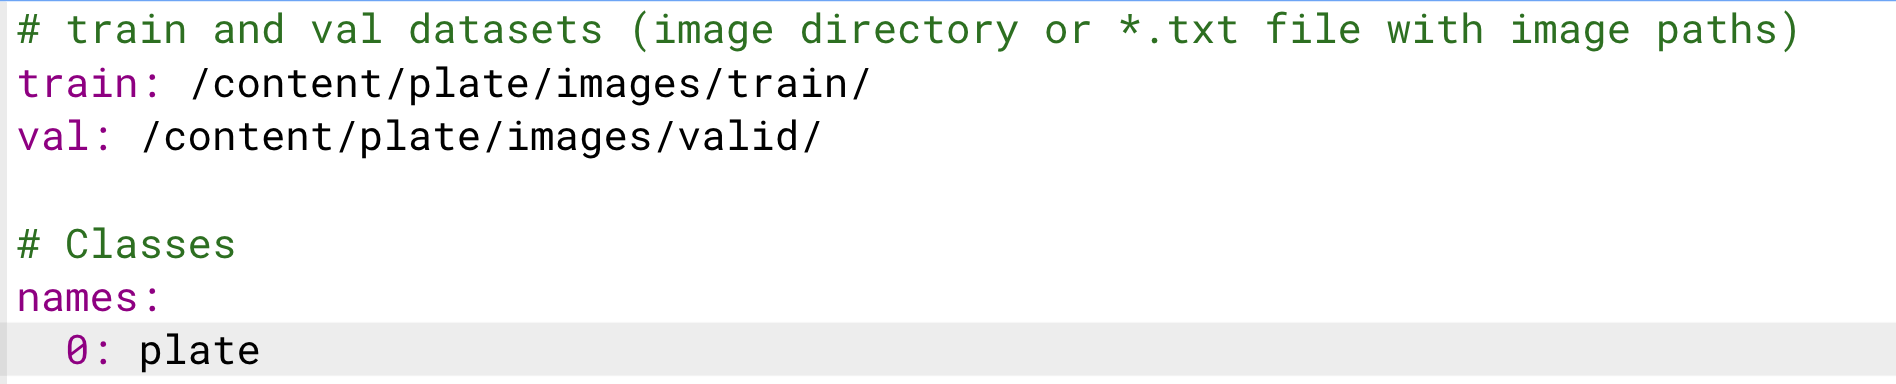



##**Multi-classes**

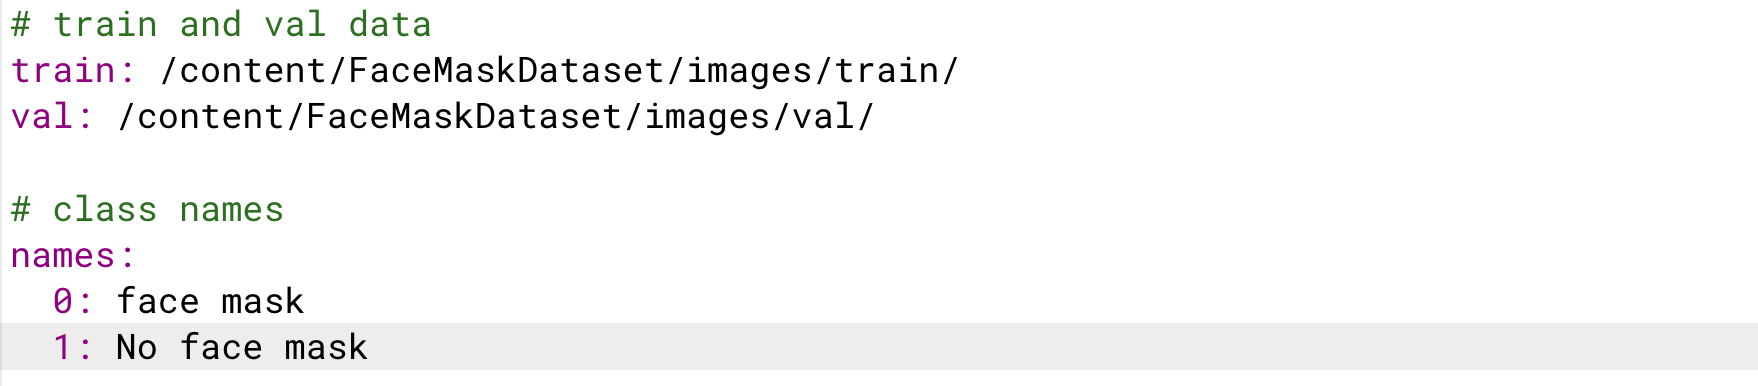

##**train custom data**

In [ ]:
# https://docs.ultralytics.com/usage/cli/
# https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

# data: yaml file to define path to data, classes' names
# model: yolov8x.pt yolov8l.pt yolov8m.pt yolov8s.pt yolov8n.pt
# a full list of train arguments: https://docs.ultralytics.com/usage/cfg/

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolo/yolo_v8/mask.yaml epochs=10 imgsz=256 plots=True
# !yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/yolo/yolo_v8/plate.yaml epochs=10 imgsz=256 plots=True

100% 21.5M/21.5M [00:00<00:00, 314MB/s]
New https://pypi.org/project/ultralytics/8.0.238 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/yolo/yolo_v8/mask.yaml, epochs=10, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize

In [ ]:
## To save model weights to your google drive!

# !cp '/content/runs/detect/train/weights/best.pt' /content/drive/MyDrive/yolo/yolo_v8/
# !cp '/content/runs/detect/train/weights/last.pt' /content/drive/MyDrive/yolo/yolo_v8/

In [ ]:
# check training metrics:
# /content/runs/detect/train/results.png
# /content/runs/detect/train/confusion_matrix.png

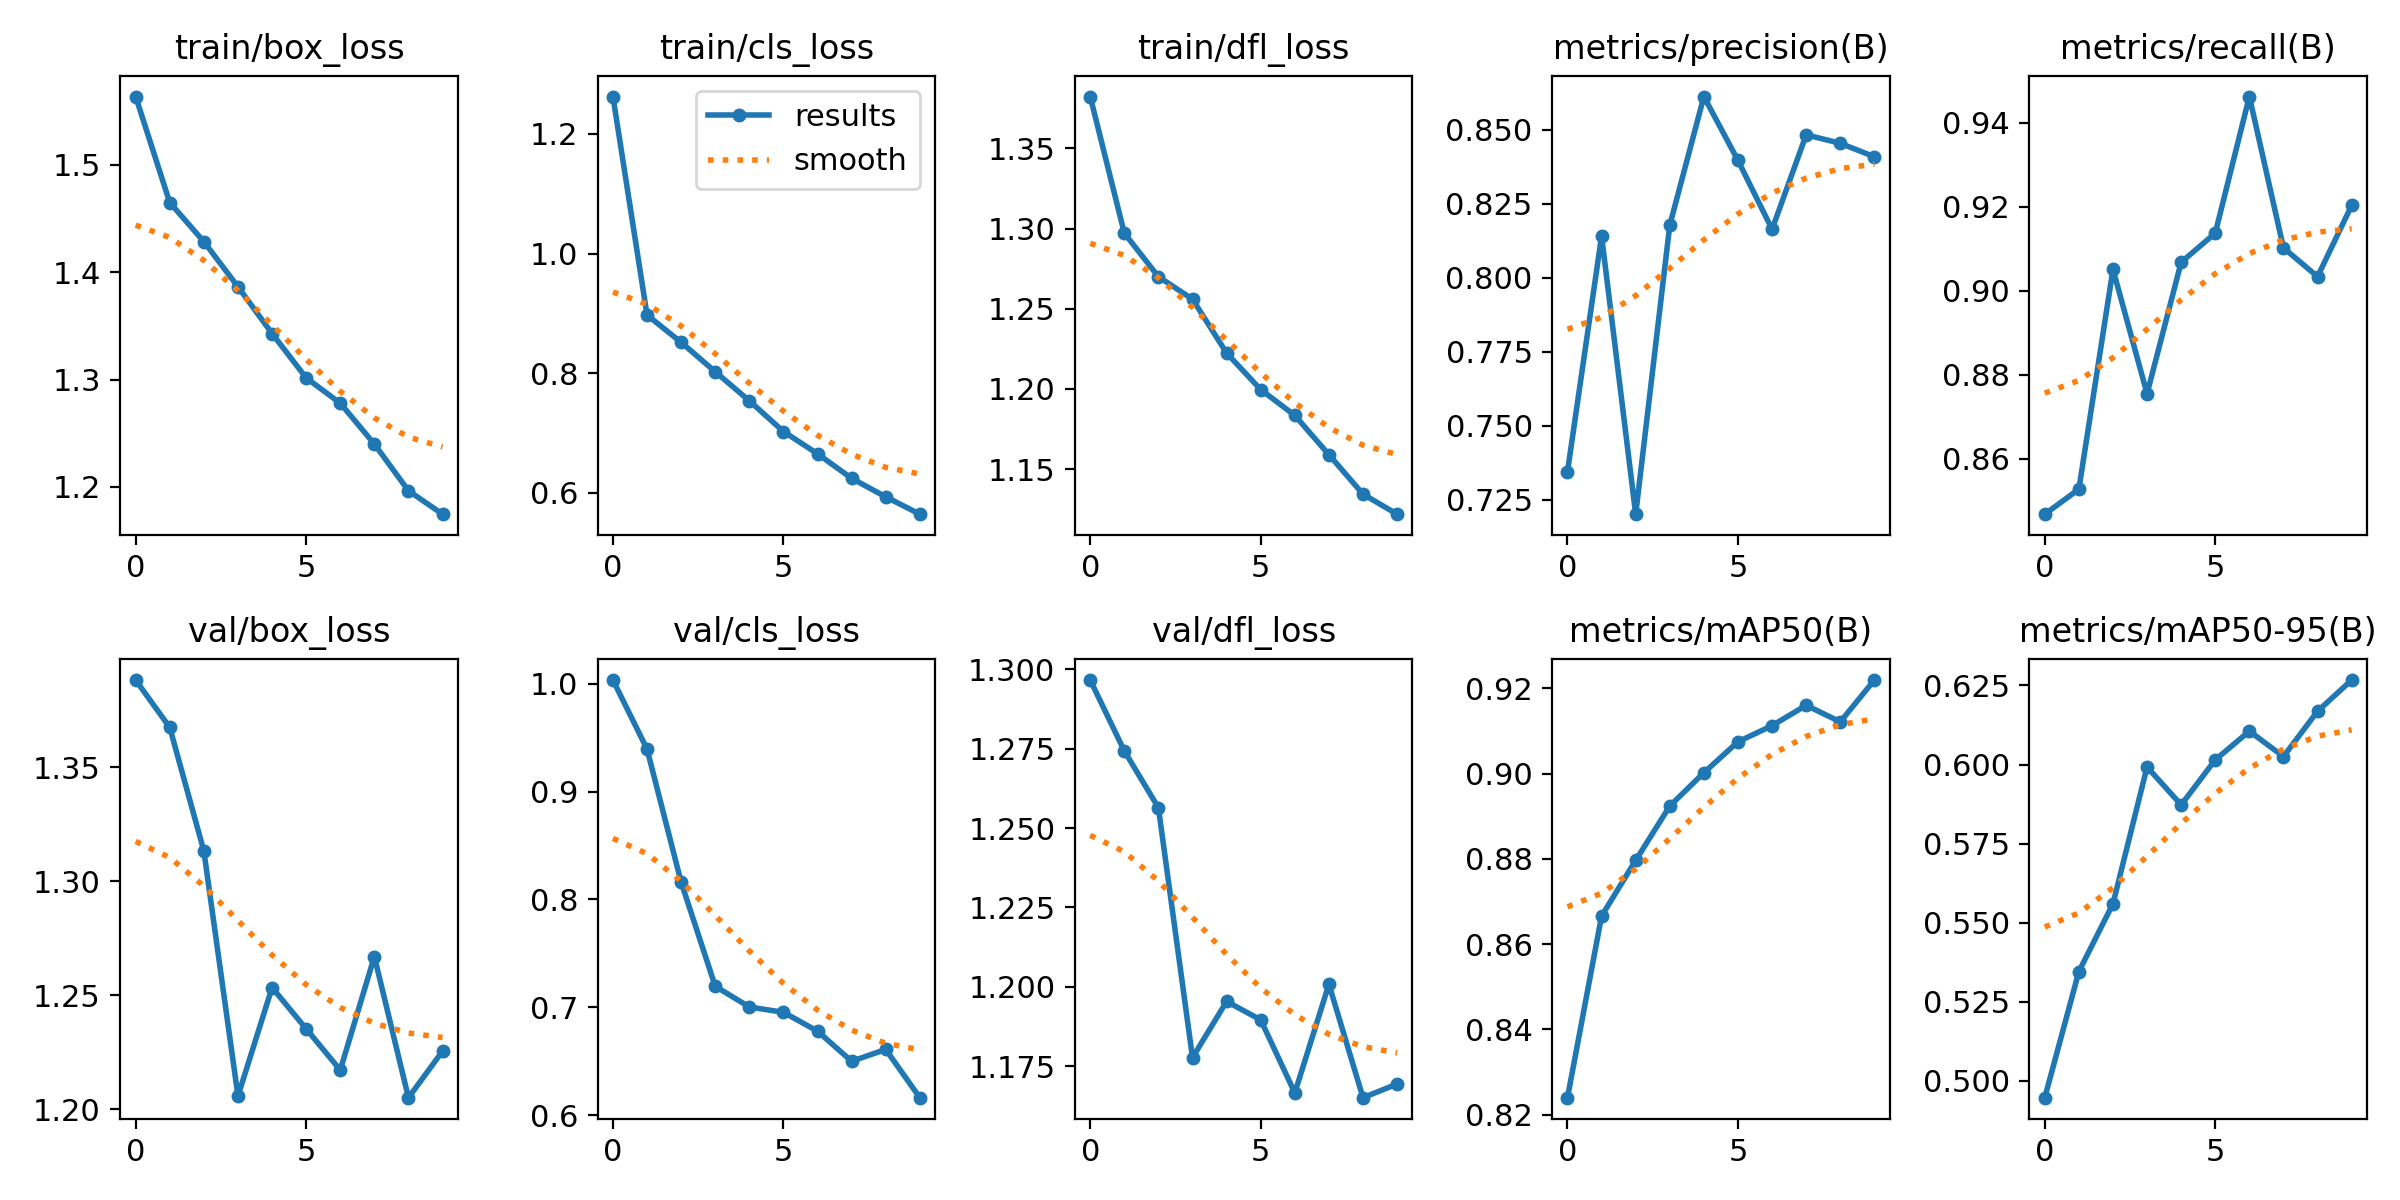

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=600)

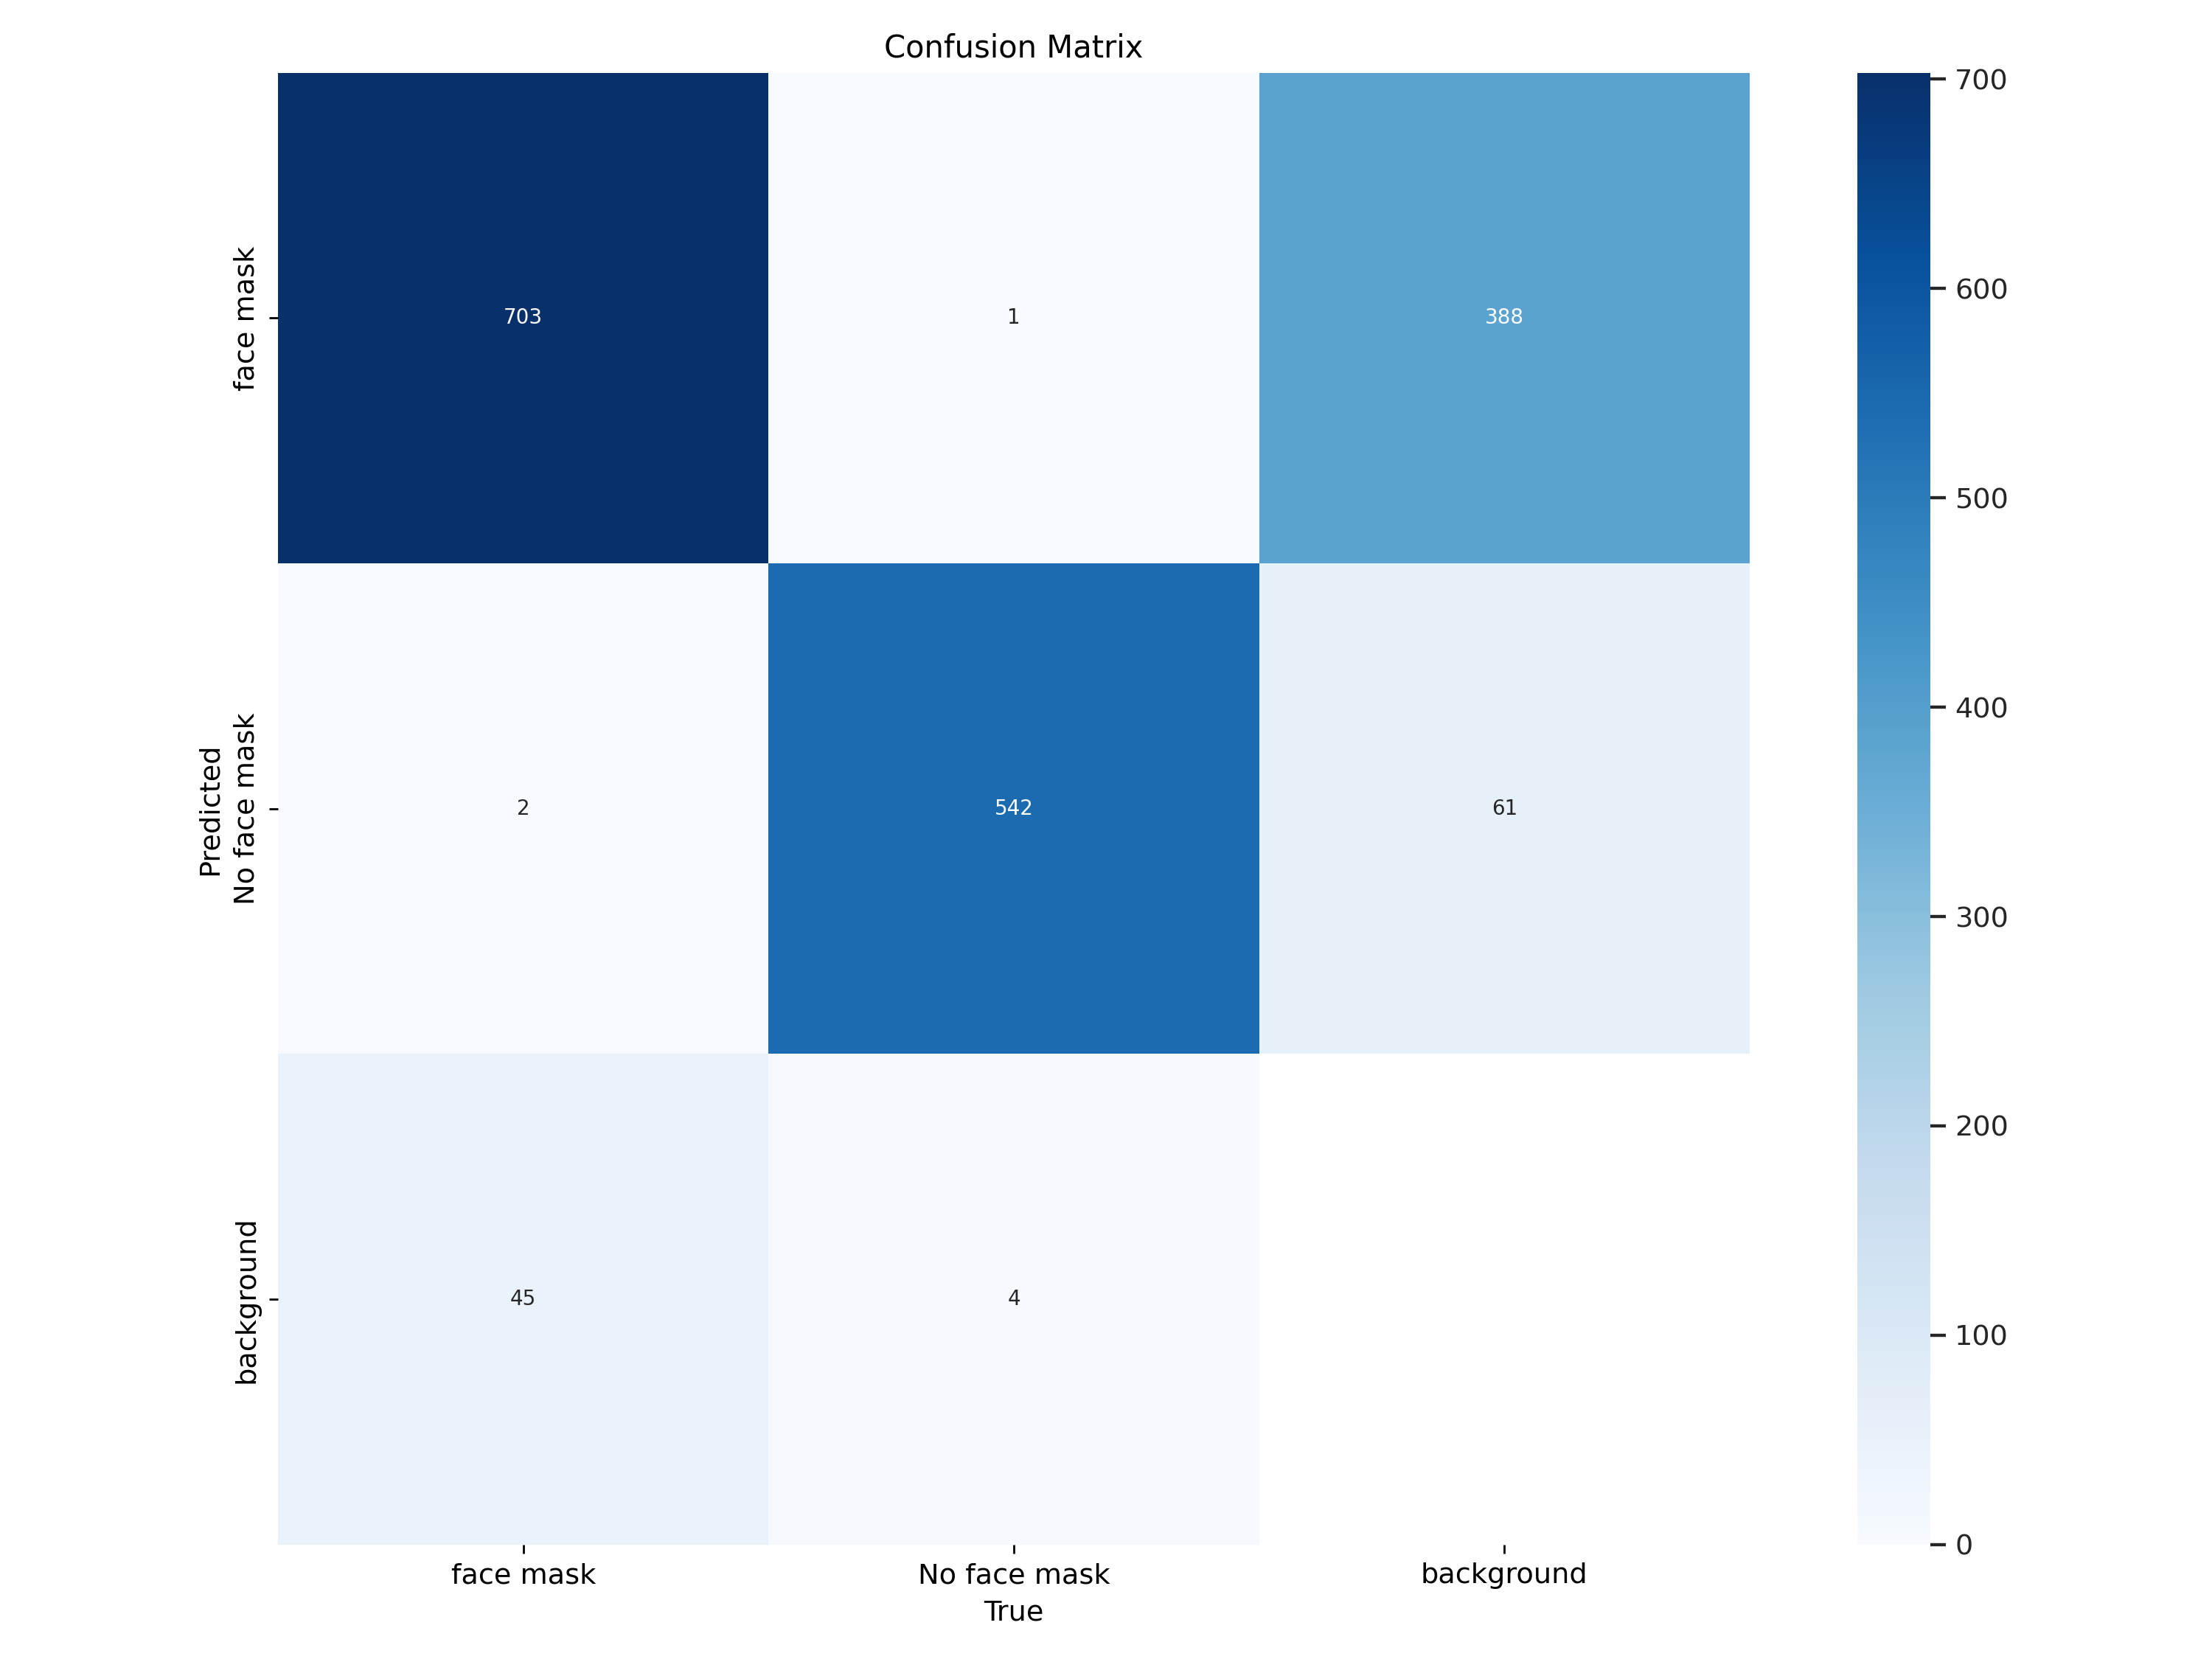

In [ ]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

##**inference on test data**

In [ ]:
# 1. CLI Command Line Interface

In [ ]:
# a full list of predict arguments: https://docs.ultralytics.com/usage/cfg/
# 預設 conf=0.25, iou=0.7

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/yolo_v8/mask.jpg save=True
# !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/yolo_v8/plates.jpg save=True

2023-11-01 04:01:56.247036: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 04:01:56.247105: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 04:01:56.247147: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/yolo/yolo_v8/mask.jpg: 160x256 4 face masks, 60.5ms
Speed: 1.0ms preprocess, 60.5ms inference, 97.5ms postprocess per image at shape (1, 3, 160, 256)
Results saved to runs/

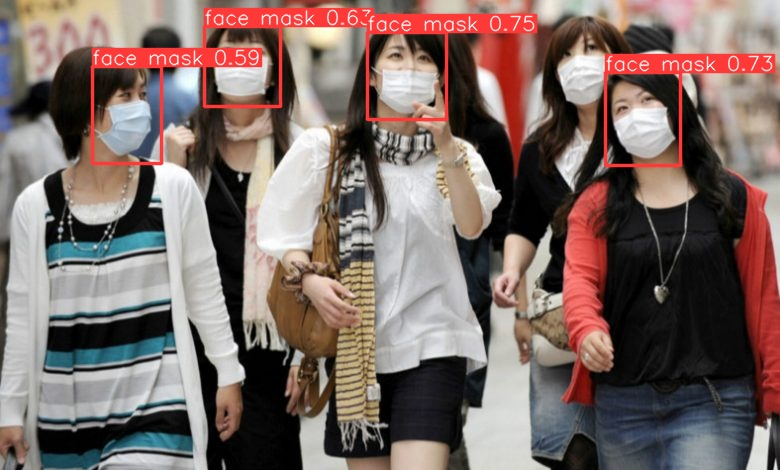

In [ ]:
display(Image(filename='/content/runs/detect/predict/mask.jpg', width=600))
# display(Image(filename='/content/runs/detect/predict/plates.jpg', width=600))

In [ ]:
# 2. SDK Software Development Kit

In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

results = model.predict(source='/content/drive/MyDrive/yolo/yolo_v8/mask.jpg', conf=0.25)
# results = model.predict(source='/content/drive/MyDrive/yolo/yolo_v8/plates.jpg', conf=0.25)


image 1/1 /content/drive/MyDrive/yolo/yolo_v8/mask.jpg: 160x256 4 face masks, 107.9ms
Speed: 0.9ms preprocess, 107.9ms inference, 3.0ms postprocess per image at shape (1, 3, 160, 256)


In [ ]:
# detected boxes' coordinates tensors
results[0].boxes.xyxy # [xmin,ymin,xmax,ymax]

tensor([[367.3231,  32.6961, 446.4078, 119.3344],
        [605.3320,  72.9296, 680.8362, 165.5624],
        [204.6722,  26.0226, 280.3063, 106.0334],
        [ 92.5780,  66.4636, 161.1242, 163.5533]], device='cuda:0')

In [ ]:
# detected boxes' coordinates arrays
results[0].boxes.xyxy.detach().cpu().numpy()

array([[     367.32,      32.696,      446.41,      119.33],
       [     605.33,       72.93,      680.84,      165.56],
       [     204.67,      26.023,      280.31,      106.03],
       [     92.578,      66.464,      161.12,      163.55]], dtype=float32)

In [ ]:
# confidence values
results[0].boxes.conf.detach().cpu().numpy()

array([    0.74536,     0.72848,     0.63144,     0.59337], dtype=float32)

In [ ]:
# classes
results[0].boxes.cls.detach().cpu().numpy()

array([          0,           0,           0,           0], dtype=float32)

In [ ]:
# local video path or youtube video link

!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo/data/test.mp4 save=True

2023-11-01 04:02:22.414636: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 04:02:22.414689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 04:02:22.414720: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.146 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

video 1/1 (1/1805) /content/drive/MyDrive/yolo/data/test.mp4: 160x256 (no detections), 105.8ms
video 1/1 (2/1805) /content/drive/MyDrive/yolo/data/test.mp4: 160x256 (no detections), 15.3ms
video 1/1 (3/180

In [ ]:
!cp /content/runs/detect/predict2/test.avi /content/drive/MyDrive/yolo/yolo_v8/



---


---



## Exer 1. 使用 plate.zip 及 plate.yaml 訓練偵測模型

## Exer 2. 下載 Apple Orange 二類圖片,訓練偵測模型